In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
sns.set_theme(color_codes=True)
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["Exited"].unique())
print(df["HasCrCard"].unique())
print(df["NumOfProducts"].unique())
print(df["IsActiveMember"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 0]
[1 0]
[1 3 2 4]
[1 0]


In [9]:
df.loc[:, "CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

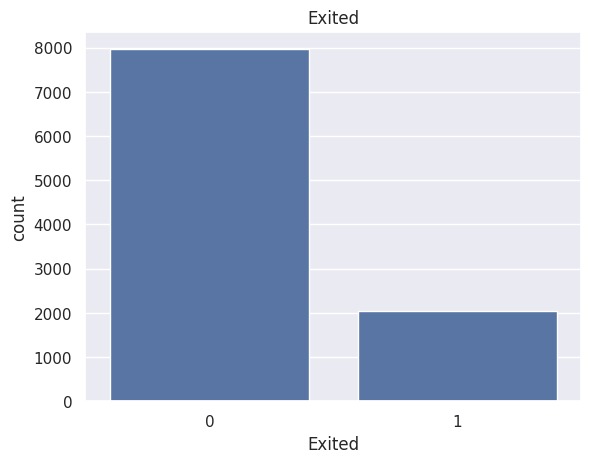

In [10]:
sns.countplot(x="Exited", data=df)
plt.title("Exited")
plt.show()

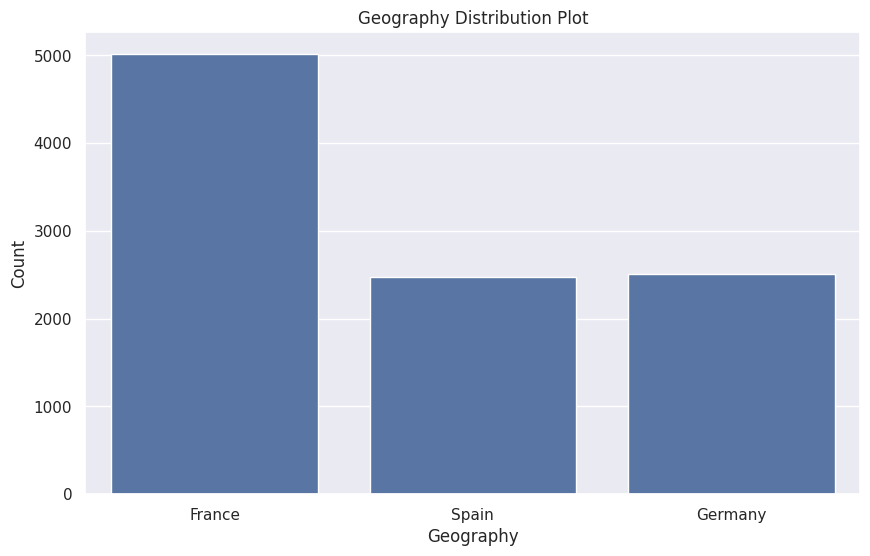

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Geography", data=df)
plt.xlabel("Geography")
plt.ylabel("Count")
plt.title("Geography Distribution Plot")
plt.show()

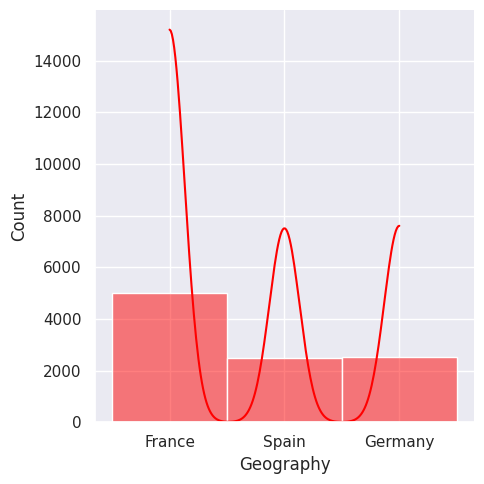

In [12]:
sns.displot(df.Geography ,kde=True, color='red')

In [16]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.drop(labels = ["RowNumber","CustomerId","Surname"],axis =1,inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df=pd.get_dummies(df,drop_first=True)

In [22]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [27]:
gb_model=GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02, max_depth =1, random_state=45)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=45)

In [28]:
gb_predicition=gb_model.predict(X_test)

In [33]:
print(confusion_matrix(y_test,gb_predicition))
print(classification_report(y_test,gb_predicition))
print("Accuracy : ",accuracy_score(y_test,gb_predicition))
print("r2_score : ",r2_score(y_test,gb_predicition))
print("recall_score : ",recall_score(y_test,gb_predicition))
print("f1_score : ",f1_score(y_test,gb_predicition))

[[1532   49]
 [ 241  178]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1581
           1       0.78      0.42      0.55       419

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.85      0.84      2000

Accuracy :  0.855
r2_score :  0.12444768499439185
recall_score :  0.42482100238663484
f1_score :  0.5510835913312694


In [40]:
rf_model=RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [41]:
rf_predicition=rf_model.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rf_predicition))
print(classification_report(y_test,rf_predicition))
print("Accuracy : ",accuracy_score(y_test,rf_predicition))
print("r2_score : ",r2_score(y_test,rf_predicition))
print("recall_score : ",recall_score(y_test,rf_predicition))
print("f1_score : ",f1_score(y_test,rf_predicition))

[[1538   43]
 [ 229  190]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1581
           1       0.82      0.45      0.58       419

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Accuracy :  0.864
r2_score :  0.17879231144301588
recall_score :  0.45346062052505964
f1_score :  0.5828220858895705


In [44]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
lr_predicition=lr.predict(X_test)


In [46]:
print(confusion_matrix(y_test,lr_predicition))
print(classification_report(y_test,lr_predicition))
print("Accuracy : ",accuracy_score(y_test,lr_predicition))
print("r2_score : ",r2_score(y_test,lr_predicition))
print("recall_score : ",recall_score(y_test,lr_predicition))
print("f1_score : ",f1_score(y_test,lr_predicition))

[[1532   49]
 [ 319  100]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1581
           1       0.67      0.24      0.35       419

    accuracy                           0.82      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000

Accuracy :  0.816
r2_score :  -0.11104569628297867
recall_score :  0.2386634844868735
f1_score :  0.35211267605633806
